Installing the packages required to unzip the dataset.

In [ ]:
# For unzipping
!pip install pyunpack
!pip install patool

Imports

In [ ]:
from keras.layers import Conv3D, Add, AveragePooling3D, Dropout, Concatenate, Flatten, Dense, BatchNormalization, Activation, Input, MaxPooling3D
from tensorflow.keras.initializers import Constant, glorot_uniform
from tensorflow.keras import Model

from keras.optimizers import SGD, Adam
from keras.utils import np_utils, generic_utils

import keras
import os
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

from pyunpack import Archive
from google.colab import drive

Mounting the drive and Unzipping the dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x

In [ ]:
Archive('/content/drive/My Drive/tmp/UCF-101.rar').extractall('/tmp')

In [ ]:
cd ..

/


In [ ]:
cd tmp/

/tmp


Reading the files for names of classes and test split of dataset.

In [ ]:
classes =[]
files_train = []

with open("classInd.txt", "r") as file:
  lines= (file.read())

file.close()
for i in (lines.split("\n"))[:25]:
  classes.append((i.split(" "))[1])


with open("trainlist01.txt", "r") as file:
  lines= (file.read())

file.close()
for i in (lines.split("\n"))[:2409]:
  files_train.append((i.split(" "))[0])

num_train = len(files_train)


print(classes)
print(files_train)
print(num_train)

In [ ]:
# image specification
img_rows,img_cols,img_depth=112,112,16


# Training data
# variable to store entire dataset

X_tr=[]          

**Train**

In [ ]:
#Assign Label to each class
tr_label=np.ones((num_train,),dtype = int)

st_point = 0
end_point = 0

video_folder = "/tmp/UCF-101/" 
for i in classes:
  print(classes.index(i))

  for j in files_train:
    if j.split("/")[0] == i:

      #Video Path (video_folder + j)
      vid = str(video_folder + j)
      #Reading the Video
      cap = cv2.VideoCapture(vid)
      #Reading Frames
      #fps = vcap.get(5)
      #To Store Frames
      frames = []
      for k in range(16): #here we get 16 frames, for example
        ret, frame = cap.read()
        if ret == True:
          print(j +' Success!')
          frame = cv2.resize(frame,(112,112),interpolation=cv2.INTER_AREA)
          frames.append(frame)
        else:
          print(j +' Error!')

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

      # When everything done, release the capture
      cap.release()
      cv2.destroyAllWindows()
      input=np.array(frames, dtype=np.float32)

      print(input.shape)
      ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
      print(ipt.shape)
      X_tr.append(ipt)
      end_point = end_point + 1

  tr_label[st_point:end_point] = classes.index(i)
  print(st_point)
  print(end_point)
  st_point = end_point + 1

files_train = []

Streaming output truncated to the last 5000 lines.
CricketBowling/v_CricketBowling_g11_c05.avi Success!
CricketBowling/v_CricketBowling_g11_c05.avi Success!
CricketBowling/v_CricketBowling_g11_c05.avi Success!
(16, 112, 112, 3)
(112, 112, 16, 3)
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowling/v_CricketBowling_g11_c06.avi Success!
CricketBowli

In [ ]:
len(X_tr)

# convert the frames read into array
X_tr_array = []
X_tr_array = np.array(X_tr, dtype= np.float32)
print(X_tr_array.shape)

train_samples = len(X_tr_array)
print(train_samples)

(2409, 112, 112, 16, 3)
2409


In [ ]:
#reducing memory usage
X_tr = [] 


In [ ]:
train_data = [X_tr_array,tr_label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)
print('y_train:',y_train.shape)

X_Train shape: (2409, 112, 112, 16, 3)
y_train: (2409,)


getting rid of the extra variables to reduce memory usage

In [ ]:
X_tr_array = []
tr_label = []
train_data = []

Making train set

In [ ]:
train_set = np.zeros((train_samples,img_rows,img_cols,img_depth,3), dtype=np.float32)

for h in range(train_samples):
    train_set[h][:][:][:][:]=X_train[h,:,:,:,:]
 

patch_size = 16   # img_depth or number of frames used for each video
print(train_set.shape, 'train samples')

(2409, 112, 112, 16, 3) train samples


In [ ]:
#reducing memory usage
X_train = []

In [ ]:
# Pre-processing

train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /= np.max(train_set)

Splitting the data to train and validation set

In [ ]:
# Split the data

X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, y_train, test_size=0.2, random_state=4)

train_set = []
y_train = []
print(X_train_new.shape)

(1927, 112, 112, 16, 3)


**Test**

Getting the list of test set videos

In [ ]:
files_test = []
with open("testlist01.txt", "r") as file:
  lines= (file.read())

file.close()
for i in (lines.split("\n"))[:951]:
  files_test.append(i)
  
num_test = len(files_test)
print(files_test)
print(num_test)

In [ ]:
X_ts=[]

In [ ]:
#Assign Label to each class
ts_label=np.ones((num_test,),dtype = int)

st_point = 0
end_point = 0

video_folder = "/tmp/UCF-101/" 
for i in classes:
  print(classes.index(i))

  for j in files_test:
    if j.split("/")[0] == i:

      #Video Path (video_folder + j)
      vid = str(video_folder + j)
      #Reading the Video
      cap = cv2.VideoCapture(vid)
      #Reading Frames
      #fps = vcap.get(5)
      #To Store Frames
      frames = []
      for k in range(16): #here we get 4 frames, for example
        ret, frame = cap.read()
        if ret == True:
          print(j +' Success!')
          frame = cv2.resize(frame,(112,112),interpolation=cv2.INTER_AREA)
          frames.append(frame)
        else:
          print(j +' Error!')

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

      # When everything done, release the capture
      cap.release()
      cv2.destroyAllWindows()
      input=np.array(frames, dtype=np.float32)

      print(input.shape)
      ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
      print(ipt.shape)
      X_ts.append(ipt)
      end_point = end_point + 1

  ts_label[st_point:end_point] = classes.index(i)
  print(st_point)
  print(end_point)
  st_point = end_point + 1

files_test = []

In [ ]:
#print(ts_label)
len(ts_label)

951

In [ ]:
print(len(X_ts))
# convert the frames read into array
X_ts_array = np.array(X_ts, dtype= np.float32)

print(X_ts_array.shape)
test_samples = len(X_ts_array)

print(test_samples)

951
(951, 112, 112, 16, 3)
951


In [ ]:
#reducing storage
X_ts = [] 

In [ ]:
test_data = [X_ts_array,ts_label]

(X_test, y_test) = (test_data[0],test_data[1])
print('X_Test shape:', X_test.shape)
print('y_Test shape:', y_test.shape)

#freeing up space
X_ts_array =[]
ts_label = []
test_data = []

X_Test shape: (951, 112, 112, 16, 3)
y_Test shape: (951,)


creating the test set

In [ ]:
test_set = np.zeros((test_samples,img_rows,img_cols,img_depth,3), dtype=np.float32)

for h in range(test_samples):
    test_set[h][:][:][:][:]=X_test[h,:,:,:,:]
 

patch_size = 16   # img_depth or number of frames used for each video
print(test_set.shape, 'test samples')

(951, 112, 112, 16, 3) test samples


In [ ]:
X_test = []

In [ ]:
# Pre-processing

test_set = test_set.astype('float32')

test_set -= np.mean(test_set)

test_set /=np.max(test_set)

**Implementation of the Apperance and Relation Network for Video Classification**

**Smart Block**
A smart block is basic computational unit.The motivation of SMART block is to simultaneously model the appearance and relation in a separate and explicit manner. It learns the spatiotemporal features with a two branch architecture. (1) appearance branch for spatial feature learning, and (2) relation branch for temporal feature learning.


In [ ]:
def smart_block(input, k=[(3,3,1),(3,3,3)], filters=64 ,strides= 1, stage = 1, block = 'a'):
  """
    Arguments:
    k -- specifying the shape of the middle CONV's window for the main path
    filters -- integer, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
  """

  #retrieving 
  Cs = Ct = filters
  Ct_prime = Ct // 2
  Ks, Kt = k

  # defining name basis
  if stage == 1:
    name_base = 'conv' + str(stage)
  else:
    name_base = 'res' + str(stage) + block + '_2'

  pool_base = 'pooling' + str(stage) + block
  redu_base = 'redu'    + str(stage) + block
  concat_base = 'concat'+ str(stage) + block

  # Appearance_branch
  F = Conv3D(filters=Cs, kernel_size=Ks, strides=strides, padding='same', name=name_base , kernel_initializer=glorot_uniform(seed=0), use_bias=False, dtype=tf.float32)(input)
  F = BatchNormalization(axis=4, name=name_base + '_bn', dtype=tf.float32)(F)
  F = Activation('relu', name=name_base + '_relu', dtype=tf.float32)(F)

  # Relation_branch
  U = Conv3D(filters=Ct, kernel_size=Kt, strides=strides, padding='same', name=name_base + '_t', kernel_initializer=glorot_uniform(seed=0), use_bias=False, dtype=tf.float32)(input)
  U = BatchNormalization(axis=4, name=name_base + '_t_bn', dtype=tf.float32)(U)
  U = tf.square(U, name='energy' + str(stage))

  Z = Conv3D(filters=Ct_prime, kernel_size=1, groups=Ct_prime, name=pool_base, kernel_initializer=Constant(value=0.5), use_bias=False, dtype=tf.float32)(U)
  Z = BatchNormalization(axis=4, name=pool_base + '_bn', dtype=tf.float32)(Z)

  #combining
  H = Concatenate(name=concat_base, dtype=tf.float32)([F,Z])
  H = Activation('relu', name=concat_base + '_relu')(H)

  H = Conv3D(filters=Ct , kernel_size=1, name=redu_base, kernel_initializer=glorot_uniform(seed=0), use_bias=False, dtype=tf.float32)(H)
  H = BatchNormalization(axis=4, name=redu_base + '_bn', dtype=tf.float32)(H)
  H = Activation('relu', name=redu_base + '_relu', dtype=tf.float32)(H)

  return H

Resnet Block with Convolution 3D

**Identity Block**

In [ ]:
def identity_block(input, k, filters, stage, block, strides = 1, with_conv_shortcut = False):
    """
    Implementation of the identity block

    Arguments:
    x -- input tensor of shape (m, n_W_prev, n_H_prev, n_T_prev n_C_prev)
    k -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- integer, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    x -- output of the identity block, tensor of shape (n_W, n_H, n_T, n_C)
    """

    # defining name basis
    name_base = 'res' + str(stage) + block

    # First component of main path
    x = Conv3D(filters, kernel_size=k, strides=strides, padding='same', name=name_base + '_1',
               activation='relu', kernel_initializer=glorot_uniform(seed=0), bias_initializer=Constant(value=0), dtype=tf.float32)(input)
    x = BatchNormalization(axis=4,name=name_base + '_1'+ '_bn', dtype=tf.float32)(x)

    # Second component of main path 
    x = Conv3D(filters, kernel_size=k, strides=1, padding='same', name=name_base + '_2',
               activation='relu', kernel_initializer=glorot_uniform(seed=0), bias_initializer=Constant(value=0), dtype=tf.float32)(x)

    if with_conv_shortcut:
        shortcut = Conv3D(filters, strides=strides, kernel_size=k, padding='same',
                          name=name_base + 'down', kernel_initializer=glorot_uniform(seed=0), bias_initializer=Constant(value=0), dtype=tf.float32)(input)
        x = Add(dtype=tf.float32)([x, shortcut])
    else:
        x = Add(dtype=tf.float32)([x, input])
    
    x = BatchNormalization(axis=4, name=name_base + '_bn', dtype=tf.float32)(x)

    return x

**SMART Identity Block**

Resnet block with Convolution 3D and SMART block in main path

In [ ]:
def smart_identity_block(input, k, filters, stage, block, strides = 1, with_conv_shortcut = False):
    """
    Implementation of the identity block

    Arguments:
    x -- input tensor of shape (m, n_W_prev, n_H_prev, n_T_prev n_C_prev)
    k -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- integer, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    x -- output of the identity block, tensor of shape (n_W, n_H, n_T, n_C)
    """

    # defining name basis
    name_base = 'res' + str(stage) + block

    # First component of main path
    x = Conv3D(filters, kernel_size=k, strides=strides, padding='same', name=name_base + '_1', 
               activation='relu', kernel_initializer=glorot_uniform(seed=0), use_bias=False, dtype=tf.float32)(input)
    x = BatchNormalization(axis=4,name=name_base + '_1'+ '_bn', dtype=tf.float32)(x)

    # Second component of main path 
    x = smart_block(x, filters=filters, strides=1, stage=stage, block=block)

    if with_conv_shortcut:
        shortcut = Conv3D(filters, strides=strides, kernel_size=k, padding='same',
                          name=name_base + 'down', kernel_initializer=glorot_uniform(seed=0), bias_initializer=Constant(value=0), dtype=tf.float32)(input)
        x = Add(dtype=tf.float32)([x, shortcut])
    else:
        x = Add(dtype=tf.float32)([x, input])
    
    x = BatchNormalization(axis=4, name=name_base + '_bn', dtype=tf.float32)(x)
    return x

Model

In [ ]:
def artnet_resnet18(input_shape=(112, 112, 4,3), classes=400):
    """
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input as a tensor with shape input_shape
    x_input = Input(input_shape)

    # Stage 1
    x = smart_block(x_input, k=[(7,7,1),(7,7,3)], filters=64, stage=1, strides=2)
    print(x.shape)
    
    # Stage 2
    x = smart_identity_block(x, k=3, filters=64, stage=2, block='a')
    x = smart_identity_block(x, k=3, filters=64, stage=2, block='b')
    print(x.shape)
    
    # Stage 3
    x = smart_identity_block(x, k=3, filters=128, stage=3, block='a', with_conv_shortcut= True, strides = 2)
    x = smart_identity_block(x, k=3, filters=128, stage=3, block='b')
    print(x.shape)
    
    # Stage 4
    x = smart_identity_block(x, k=3, filters=256, stage=4, block='a', with_conv_shortcut= True, strides = 2)
    x = smart_identity_block(x, k=3, filters=256, stage=4, block='b')
    print(x.shape)
    
    # Stage 5
    x = identity_block(x, k=3, filters=512, stage=5, block='a', with_conv_shortcut= True, strides = 2)
    x = identity_block(x, k=3, filters=512, stage=5, block='b')
    print(x.shape)
    
    # AVGPOOL
    x = AveragePooling3D(pool_size=(7,7,1), strides=1)(x)
    print(x.shape)
    
    x = Dropout(0.5)(x)
    
    # output layer
    x = Flatten()(x)
    print(x.shape)

    x = Dropout(0.5)(x)
    x = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(x)
    print(x.shape)

    # Create model
    model = Model(inputs=x_input, outputs=x, name='artnet_resnet18')

    return model

**Compile**

In [ ]:
# CNN Training parameters

batch_size = 32
nb_classes = 25
nb_epoch = 12


In [ ]:
model = artnet_resnet18(input_shape=(img_rows, img_cols, patch_size,3), classes=len(classes))
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.1, 
    staircase=True)

optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(
    optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

(None, 56, 56, 8, 64)
(None, 56, 56, 8, 64)
(None, 28, 28, 4, 128)
(None, 14, 14, 2, 256)
(None, 7, 7, 1, 512)
(None, 1, 1, 1, 512)
(None, 512)
(None, 25)


In [ ]:
model.summary()

Model: "artnet_resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 112, 112, 16 0                                            
__________________________________________________________________________________________________
conv1_t (Conv3D)                (None, 56, 56, 8, 64 28224       input_1[0][0]                    
__________________________________________________________________________________________________
conv1_t_bn (BatchNormalization) (None, 56, 56, 8, 64 256         conv1_t[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 56, 56, 8, 64 9408        input_1[0][0]                    
____________________________________________________________________________________

**Training**

In [ ]:
import keras
callbacks = [
    keras.callbacks.ReduceLROnPlateau(verbose=1),
    keras.callbacks.ModelCheckpoint(
        'chkp/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
        verbose=1),
]

In [ ]:
hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),
          batch_size=batch_size, epochs=nb_epoch, shuffle=True, callbacks=callbacks)

Epoch 1/12
61/61 [==============================] - ETA: 0s - loss: 3.0038 - acc: 0.1806
Epoch 00001: saving model to chkp/weights.01-3.23.hdf5
61/61 [==============================] - 389s 6s/step - loss: 3.0038 - acc: 0.1806 - val_loss: 3.2278 - val_acc: 0.0311
Epoch 2/12
61/61 [==============================] - ETA: 0s - loss: 2.5004 - acc: 0.2974
Epoch 00002: saving model to chkp/weights.02-3.54.hdf5
61/61 [==============================] - 385s 6s/step - loss: 2.5004 - acc: 0.2974 - val_loss: 3.5383 - val_acc: 0.0394
Epoch 3/12
61/61 [==============================] - ETA: 0s - loss: 2.0923 - acc: 0.4001
Epoch 00003: saving model to chkp/weights.03-3.80.hdf5
61/61 [==============================] - 384s 6s/step - loss: 2.0923 - acc: 0.4001 - val_loss: 3.7988 - val_acc: 0.0539
Epoch 4/12
61/61 [==============================] - ETA: 0s - loss: 1.8239 - acc: 0.4686
Epoch 00004: saving model to chkp/weights.04-2.93.hdf5
61/61 [==============================] - 384s 6s/step - loss: 1.

**Plot the results**

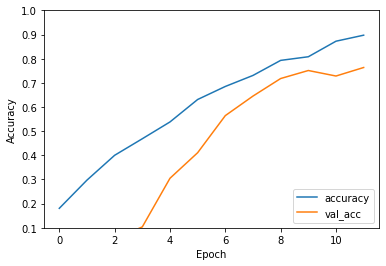

In [ ]:
plt.plot(hist.history['acc'], label='accuracy')
plt.plot(hist.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

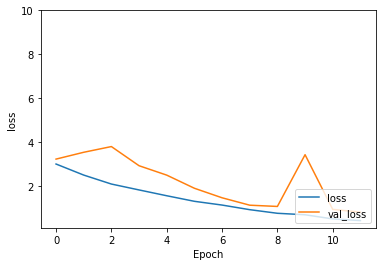

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.1, 10])
plt.legend(loc='lower right')

**Evaluate**

In [ ]:
results = model.evaluate(x=test_set, y=y_test, batch_size=batch_size, verbose=2, callbacks=callbacks)
print("test loss, test acc:", results)

30/30 - 45s - loss: 2.3077 - acc: 0.4280
test loss, test acc: [2.307713508605957, 0.4279705584049225]


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], results[1]*100))

acc: 42.80%


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`

print("Generate predictions for 3 samples")
predictions = model.predict(test_set[:1])

maximum = np.max(predictions)
index_of_maximum = np.where(predictions == maximum)
print(index_of_maximum)


Generate predictions for 3 samples
(array([0]), array([1]))


In [ ]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x=test_set, y=y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 42.80%
